In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as ss
import common_func as cf

In [57]:
def find_trend(y, years):
    X_sm = sm.add_constant(years)
    lr = sm.OLS(y, X_sm).fit()
    return lr


def add_trend(y, years, add):
    if add:
        y_new = y + 0.0002 * years
        return y_new
    else:
        return y
    

In [63]:
def fit_exp(maxP, years):
    lnmaxP = np.log(maxP)
    y = add_trend(lnmaxP, years, False)
    lr = find_trend(y, years)
    alpha,beta = lr.params
#     print(lr.summary())
    ybar,std, skew = cf.findmoments(y)
    n =len(years)
    print(beta)
    tbar = np.mean(years)
    zp = ss.norm.ppf(0.99)
    xp = np.exp(ybar + beta*(years - tbar) + zp * std)
    return xp,beta
    

In [68]:
def vogel_results(beta,del_t, rp,std):
    mag_f = np.exp(beta * del_t)
    cdf = 1-1/rp
    z_po = ss.norm.ppf(cdf)
    T_f = 1 /(1 - ss.norm.cdf(z_po -  (beta * del_t/ std)))
    return mag_f, T_f

100 year return period precipitation: 6.18 inch
0.0036414814147660663


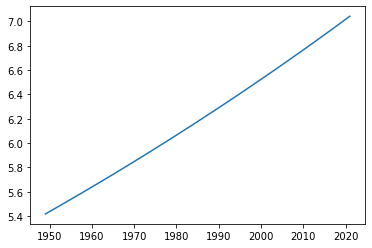

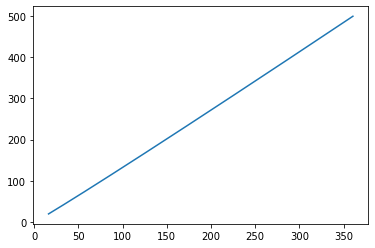

In [69]:
data = pd.read_csv('precip.csv')
maxP, years = cf.annual_max(data)
lnmaxP = np.log(maxP)
ybar,std, skew = cf.findmoments(lnmaxP)
zp = ss.norm.ppf(0.99)
xp = np.exp(ybar + zp * std)
print('100 year return period precipitation:%5.2f' %xp,'inch')

# Plotting 100 year return period precipitation for different years
m, beta = fit_exp(maxP, years)
plt.plot(years,m)
plt.show()
return_periods = np.arange(20,500)
mag_f, T_f = vogel_results(beta,10, return_periods,std)


# Plotting 100 year return period precipitation for different years
plt.plot(T_f, return_periods)
plt.show()